In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

# Plot poles, interpolation nodes and equioscillation points
and re-use previously computed interpolation nodes

In [2]:
n = 12
tol = 1e-6

winit = rexpi.buerrest_getw(n,tol)
wfin = (n+0.5)*np.pi
ws = np.linspace(winit,wfin,10)
nw = len(ws)
inodes = np.zeros((2*n+1,nw))
eopoints = np.zeros((2*n+2,nw))
aprxerr = np.zeros(nw)
polesreal = np.zeros((n,nw))
polesimag = np.zeros((n,nw))
nodes_pos = None
usetol=1e-3

print(" j |    w  |  Remez                    |")
print("   |       | iter| rel.devi | error    | err.est.")
for (ij,w) in zip(range(len(ws)),ws):
    rx, brnodes, allerr = rexpi.brib(w = w, n = n, nodes_pos = nodes_pos, npi=50,
                                      maxiter = 700, tolequi = usetol, step_factor=0.02)
    intnodes, equnodes = brnodes[1],brnodes[0]
    errors1 = list(zip(*allerr))[0]
    deviations1 = list(zip(*allerr))[1]

    nodes_pos = intnodes[intnodes>=0]

    errestnow = rexpi.buerrest(n,w)
    inodes[:,ij] = intnodes
    eopoints[:,ij] = equnodes
    aprxerr[ij] = errors1[-1]
    
    lams = rx.getpoles()
    ijxi = np.argsort(lams.imag)
    polesreal[:,ij], polesimag[:,ij] = lams.real[ijxi], lams.imag[ijxi]

    print("{:2d} |  {:4.1f} | {:3d} | {:.2e} | {:.2e} | {:.2e}".format(ij,w, len(allerr),deviations1[-1],errors1[-1], errestnow))

 j |    w  |  Remez                    |
   |       | iter| rel.devi | error    | err.est.
 0 |  20.6 | 114 | 9.99e-04 | 9.12e-07 | 1.00e-06
 1 |  22.7 |  92 | 9.72e-04 | 9.60e-06 | 1.10e-05
 2 |  24.7 | 108 | 9.85e-04 | 8.07e-05 | 9.82e-05
 3 |  26.8 | 129 | 9.85e-04 | 5.58e-04 | 7.34e-04
 4 |  28.9 | 158 | 9.93e-04 | 3.25e-03 | 4.73e-03
 5 |  31.0 | 191 | 9.79e-04 | 1.61e-02 | 2.67e-02
 6 |  33.0 | 225 | 9.84e-04 | 6.84e-02 | 1.35e-01
 7 |  35.1 | 253 | 9.76e-04 | 2.48e-01 | 6.19e-01
 8 |  37.2 | 256 | 9.92e-04 | 7.34e-01 | 2.60e+00
 9 |  39.3 | 236 | 9.92e-04 | 1.59e+00 | 1.01e+01


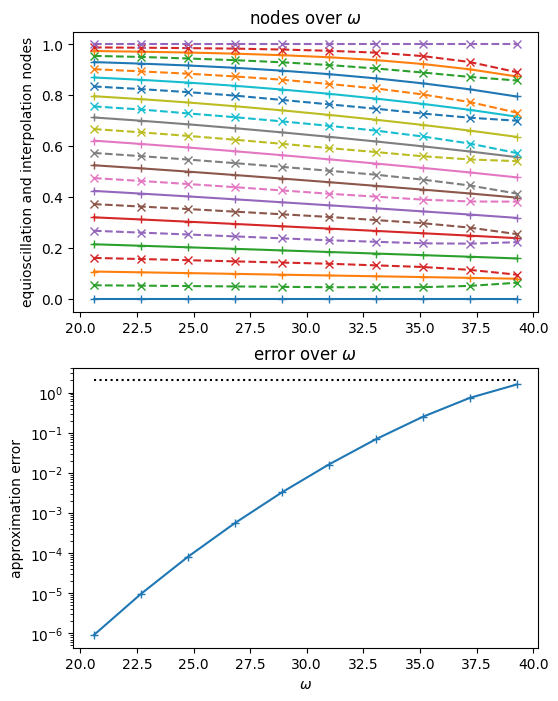

In [3]:
fig, axs = plt.subplots(2,1,figsize=(6,8))

# plot only positive interpolation nodes
for j in range(n):
    axs[0].plot(ws,inodes[n+j,:],'-+',markersize=6)
for j in range(n+1):
    axs[0].plot(ws,eopoints[n+1+j,:],'--x')
axs[0].title.set_text("nodes over $\omega$")
axs[0].set_ylabel("equioscillation and interpolation nodes")
axs[1].semilogy(ws,aprxerr,'-+')
axs[1].semilogy([ws[0],ws[-1]],[2,2],':k')
axs[1].title.set_text("error over $\omega$")
axs[1].set_ylabel("approximation error")
axs[1].set_xlabel("$\omega$");


plots poles for multiple values of w


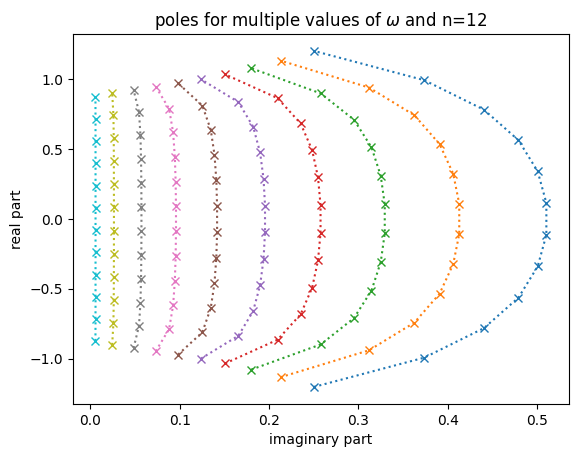

In [4]:
print("plots poles for multiple values of w")
for j in range(len(ws)):
    plt.plot(polesreal[:,j],polesimag[:,j],':x')
plt.title("poles for multiple values of $\omega$ and n={}".format(n))
plt.xlabel("imaginary part")
plt.ylabel("real part");


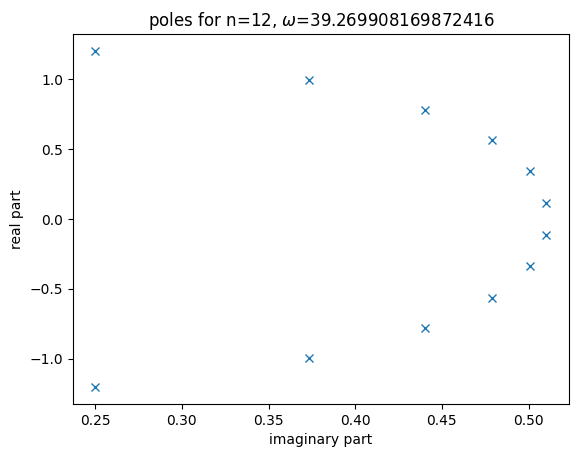

In [5]:
iw=0
plt.plot(polesreal[:,iw],polesimag[:,iw],'x');
plt.title("poles for n={}, $\omega$={}".format(n,w))
plt.xlabel("imaginary part")
plt.ylabel("real part");